In [ ]:
pip install pandas scikit-learn streamlit joblib google-generativeai plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# The key is adding sep=';'
df = pd.read_csv('student-por.csv', sep=',')

# Now check the info and the first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

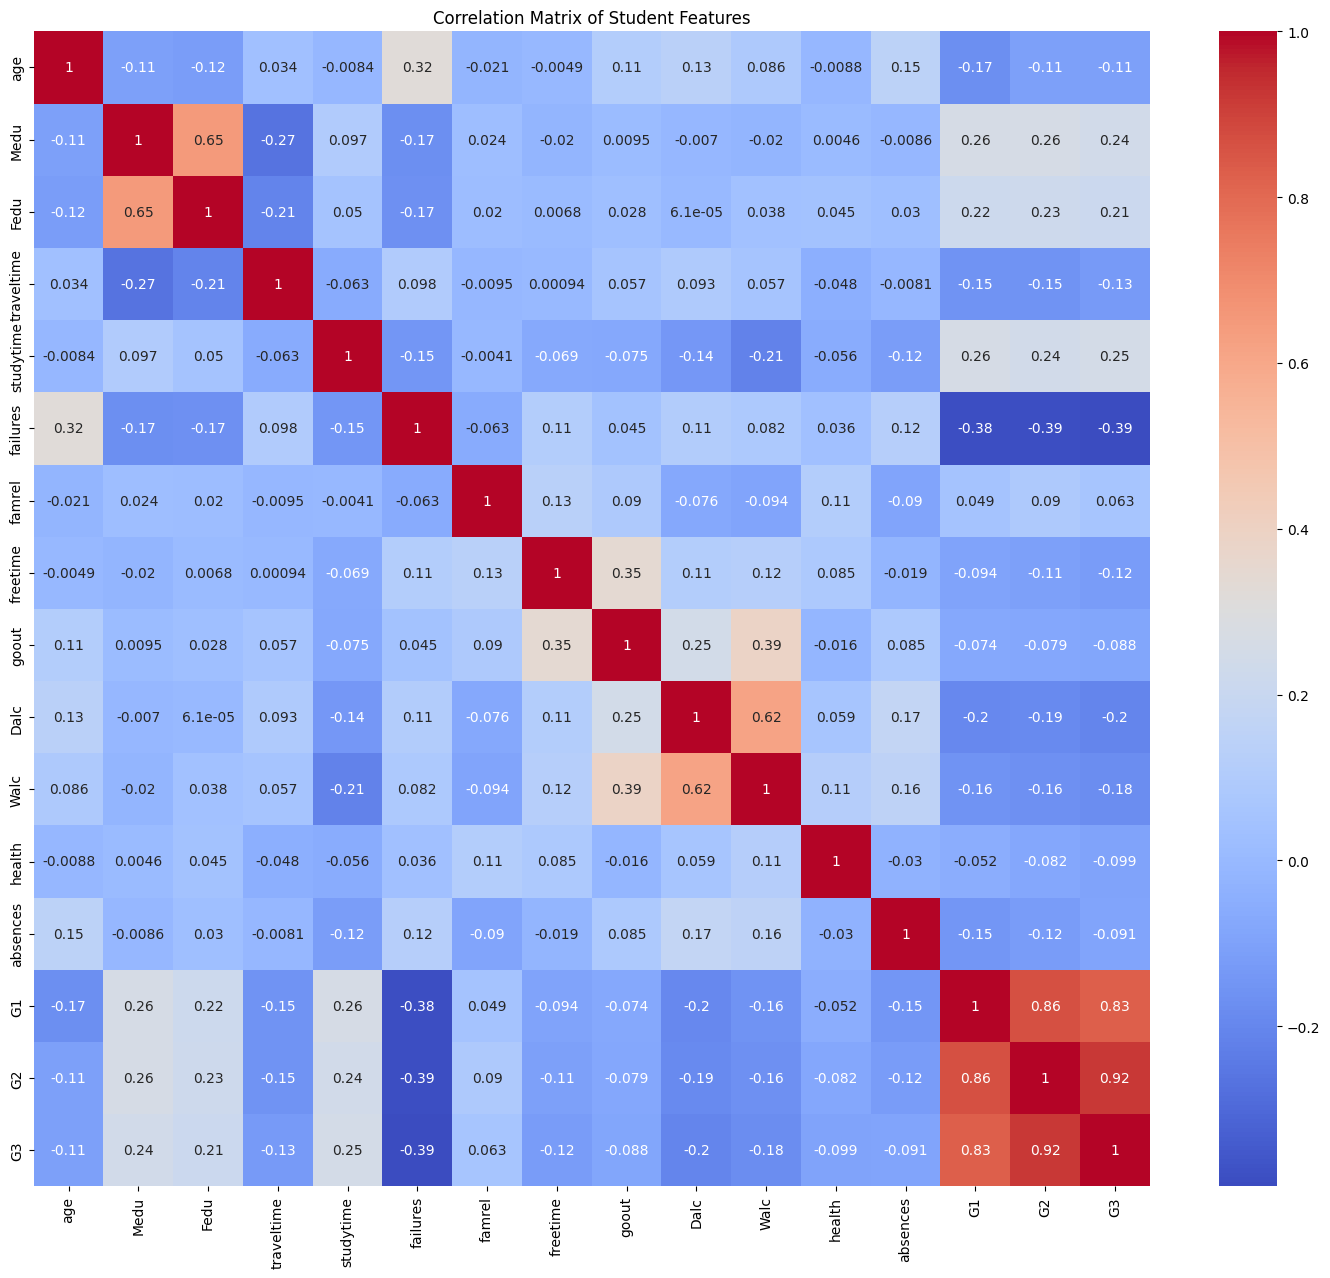

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 15))

# Calculate correlations
# The 'numeric_only=True' argument is important if you have non-numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Student Features')
plt.show()

In [ ]:
# Convert categorical columns into dummy/indicator variables
df_processed = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the new processed dataframe
print(df_processed.head())

   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         0       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  guardian_mother  guardian_other  schoolsup_yes  famsup_yes  \
0     1  ...             True           False           True       False   
1     1  ...            False           False          False        True   
2     2  ...             True           False           True       False   
3     1  ...             True           False          False        True   
4     1  ...            False           False          False        True   

   paid_yes  activities_yes  nursery_yes  higher_yes  internet

In [ ]:
# The target is the 'Grade' column
y = df_processed['G3']

# The features are all the other columns
X = df_processed.drop('G3', axis=1)

In [ ]:
print(df_processed.columns)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Absolute Error (MAE): 0.75
R-squared (R2 Score): 0.84


In [ ]:
import joblib

# Save the model to a file named 'student_model.pkl'
joblib.dump(model, 'student_model.pkl')

print("Model saved successfully as student_model.pkl")

# IMPORTANT: Download this file from your Colab session!
# You'll need to re-upload it when you run the app.
from google.colab import files
files.download('student_model.pkl')

Model saved successfully as student_model.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd

st.title("🧠 AI Personalized Learning Assistant")
st.write("This app predicts a student's final grade and provides personalized advice based on their habits and learning style.")

# --- User Inputs in the Sidebar---
st.sidebar.header("Enter Student Details:")

studytime = st.sidebar.slider('Weekly Study Time (1-4)', 1, 4, 2)
failures = st.sidebar.slider('Past Class Failures (0-4)', 0, 4, 0)
goout = st.sidebar.slider('Socializing with Friends (1-5)', 1, 5, 3)
absences = st.sidebar.slider('Number of School Absences', 0, 93, 5)

learning_style = st.sidebar.selectbox(
    "What's your preferred learning style?",
    ("Visual", "Auditory", "Reading/Writing", "Kinesthetic")
)

# --- Main Action Button ---
if st.button("Generate My Personalized Plan"):
    st.write("Prediction and feedback will appear here soon!")

Writing app.py


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib

# --- 1. LOAD THE TRAINED MODEL ---
try:
    model = joblib.load('student_model.pkl')
except FileNotFoundError:
    st.error("Model file not found. Please upload 'student_model.pkl'.")
    st.stop()

# Define the full list of columns the model was trained on
# This is crucial for creating the input DataFrame correctly
MODEL_COLUMNS = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
                 'G1', 'G2', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3',
                 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services',
                 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
                 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
                 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes',
                 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
                 'internet_yes', 'romantic_yes']


st.title("🧠 AI Personalized Learning Assistant")
st.write("This app predicts a student's final grade and provides personalized advice based on their habits and learning style.")

# --- User Inputs in the Sidebar---
st.sidebar.header("Enter Student Details:")
studytime = st.sidebar.slider('Weekly Study Time (1-4)', 1, 4, 2)
failures = st.sidebar.slider('Past Class Failures (0-4)', 0, 4, 0)
goout = st.sidebar.slider('Socializing with Friends (1-5)', 1, 5, 3)
absences = st.sidebar.slider('Number of School Absences', 0, 93, 5)

learning_style = st.sidebar.selectbox(
    "What's your preferred learning style?",
    ("Visual", "Auditory", "Reading/Writing", "Kinesthetic")
)

# --- 2. PREDICTION LOGIC ---
if st.button("Generate My Personalized Plan"):
    # Create a DataFrame with default values for all columns
    input_df = pd.DataFrame(0, index=[0], columns=MODEL_COLUMNS)

    # Update the DataFrame with user inputs from the sliders
    input_df['studytime'] = studytime
    input_df['failures'] = failures
    input_df['goout'] = goout
    input_df['absences'] = absences

    # For this simple app, we can set reasonable defaults for other key features
    # In a real app, you would have more input fields for these.
    input_df['age'] = 17 # Average age
    input_df['G1'] = 11  # Average first period grade
    input_df['G2'] = 11  # Average second period grade

    # Make the prediction
    prediction = model.predict(input_df)[0]

    # --- 3. DISPLAY THE PREDICTION ---
    st.header(f"Predicted Final Grade: {prediction:.2f} / 20")

    st.info("Personalized feedback from the AI will appear here tomorrow!")

Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import joblib
import google.generativeai as genai
import os

# --- API & MODEL CONFIGURATION ---
try:
    # Read the secret key from an environment variable
    GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')

    if not GEMINI_API_KEY:
        st.error("GEMINI_API_KEY is not set. Please follow the instructions in the Colab notebook.")
        st.stop()

    genai.configure(api_key=GEMINI_API_KEY)

    # Initialize the generative model
    llm = genai.GenerativeModel('gemini-2.5-pro')

    # Load the trained machine learning model
    model = joblib.load('student_model.pkl')

except Exception as e:
    st.error(f"An error occurred during initialization: {e}")
    st.stop()

# --- CONSTANTS ---
MODEL_COLUMNS = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
                 'G1', 'G2', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3',
                 'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services',
                 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
                 'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
                 'guardian_mother', 'guardian_other', 'schoolsup_yes', 'famsup_yes',
                 'paid_yes', 'activities_yes', 'nursery_yes', 'higher_yes',
                 'internet_yes', 'romantic_yes']

# --- LLM PROMPT FUNCTION ---
def create_master_prompt(student_data, predicted_grade, style):
    prompt = f"""
    You are an expert AI academic advisor. Your tone is supportive and encouraging.

    A student has provided the following information:
    - Weekly Study Time (1-4): {student_data['studytime']}
    - Past Class Failures: {student_data['failures']}
    - Socializing (1-5): {student_data['goout']}
    - Absences: {student_data['absences']}
    - Preferred Learning Style: {style}

    Our predictive model estimates their final grade will be {predicted_grade:.2f} out of 20.

    Your task is to provide two things in your response:

    1.  **Personalized Advice:** Write a short paragraph of feedback (3-4 sentences) tailored to the student's **{style}** learning style.
    2.  **Actionable Resource:** Recommend one specific, real, and free online resource (like a YouTube video, a website, or a free app) that aligns with their **{style}**.

    Structure your response with markdown headings for "Personalized Advice" and "Recommended Resource".
    """
    return prompt

# --- STREAMLIT APP UI ---
st.title("🧠 AI Personalized Learning Assistant")
st.write("This app predicts a student's final grade and provides personalized advice based on their habits and learning style.")

st.sidebar.header("Enter Student Details:")
studytime = st.sidebar.slider('Weekly Study Time (1-4)', 1, 4, 2)
failures = st.sidebar.slider('Past Class Failures (0-4)', 0, 4, 0)
goout = st.sidebar.slider('Socializing with Friends (1-5)', 1, 5, 3)
absences = st.sidebar.slider('Number of School Absences', 0, 93, 5)
learning_style = st.sidebar.selectbox("What's your preferred learning style?", ("Visual", "Auditory", "Reading/Writing", "Kinesthetic"))

if st.button("Generate My Personalized Plan"):
    # Create input DataFrame for the ML model
    input_df = pd.DataFrame(0, index=[0], columns=MODEL_COLUMNS)
    input_df['studytime'] = studytime
    input_df['failures'] = failures
    input_df['goout'] = goout
    input_df['absences'] = absences

    # Set reasonable defaults for other key features
    input_df['age'] = 17
    input_df['G1'] = 11
    input_df['G2'] = 11

    # Make the grade prediction
    predicted_grade = model.predict(input_df)[0]
    st.header(f"Predicted Final Grade: {predicted_grade:.2f} / 20")

    # Generate and display the LLM feedback
    with st.spinner("Generating your personalized plan..."):
        master_prompt = create_master_prompt(input_df.iloc[0], predicted_grade, learning_style)
        response = llm.generate_content(master_prompt)
        st.markdown(response.text)

Overwriting app.py


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import userdata
from pyngrok import ngrok
import os

# --- Kill previous tunnels ---
ngrok.kill()

# 1. Get the Gemini API key from Colab secrets
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

# 2. Get your ngrok authtoken from Colab secrets
NGROK_AUTHTOKEN = userdata.get('NGROK_AUTHTOKEN')
ngrok.set_auth_token(NGROK_AUTHTOKEN)

# 3. Build the command to run Streamlit in the background
command = f"GEMINI_API_KEY={GEMINI_API_KEY} streamlit run app.py &"

# 4. Run the Streamlit app
os.system(command)

# 5. Create a public URL with ngrok
public_url = ngrok.connect('8501')
print('Your app is live at:', public_url)

Your app is live at: NgrokTunnel: "https://alverta-boldhearted-legalistically.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
import shutil
import os
import glob
import tempfile

# Define the files to be included in the zip
# Assuming the notebook name ends with .ipynb
notebook_filename = 'AIIPL.ipynb' # Use the provided notebook name

files_to_zip = ['student-por.csv', 'app.py', notebook_filename]

# Define the name of the zip archive
zip_filename = 'student_project_complete.zip'
zip_base_name = zip_filename.replace('.zip', '')

# Create a temporary directory
with tempfile.TemporaryDirectory() as tmpdir:
    # Copy the desired files into the temporary directory
    for file_name in files_to_zip:
        if os.path.exists(file_name):
            shutil.copy(file_name, tmpdir)
        else:
            print(f"Warning: File '{file_name}' not found and will not be included in the zip.")

    # Create the zip archive of the temporary directory
    shutil.make_archive(zip_base_name, 'zip', tmpdir)

print(f"Created zip archive: {zip_filename}")

# You can now download the zip file using the files.download() function
from google.colab import files
files.download(zip_filename)

Created zip archive: student_project_complete.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls -l

total 2124
-rw-r--r-- 1 root root    4062 Oct 19 08:08 app.py
drwx------ 5 root root    4096 Oct 19 08:08 drive
drwxr-xr-x 1 root root    4096 Oct 16 13:41 sample_data
-rw-r--r-- 1 root root 2050433 Oct 19 08:08 student_model.pkl
-rw-r--r-- 1 root root   93220 Oct 19 08:07 student-por.csv
-rw-r--r-- 1 root root   13125 Oct 19 08:09 student_project_complete.zip


In [ ]:
import shutil
import os

# Define the source and destination paths
source_path = 'app.py'
# Define the destination folder in your Google Drive
destination_folder = '/content/drive/MyDrive/Colab Notebooks'
# Define the full destination path
destination_path = os.path.join(destination_folder, 'app.py')

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Copy the file
shutil.copy(source_path, destination_path)

print(f"'{source_path}' copied to '{destination_path}'")

'app.py' copied to '/content/drive/MyDrive/Colab Notebooks/app.py'


In [ ]:
import google.generativeai as genai
from google.colab import userdata
import pandas as pd

try:
    # Configure with your key
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
    genai.configure(api_key=GEMINI_API_KEY)

    print("Finding available models...")

    models_list = []
    # List the models
    for model in genai.list_models():
      if 'generateContent' in model.supported_generation_methods:
        models_list.append(model.name)

    if models_list:
        print("\n✅ The following models are available for you to use:")
        for model_name in models_list:
            print(f"- {model_name}")
    else:
        print("\n❌ No models supporting 'generateContent' were found for your API key.")

except Exception as e:
    print(f"An error occurred: {e}")

Finding available models...

✅ The following models are available for you to use:
- models/gemini-2.5-pro-preview-03-25
- models/gemini-2.5-flash-preview-05-20
- models/gemini-2.5-flash
- models/gemini-2.5-flash-lite-preview-06-17
- models/gemini-2.5-pro-preview-05-06
- models/gemini-2.5-pro-preview-06-05
- models/gemini-2.5-pro
- models/gemini-2.0-flash-exp
- models/gemini-2.0-flash
- models/gemini-2.0-flash-001
- models/gemini-2.0-flash-exp-image-generation
- models/gemini-2.0-flash-lite-001
- models/gemini-2.0-flash-lite
- models/gemini-2.0-flash-preview-image-generation
- models/gemini-2.0-flash-lite-preview-02-05
- models/gemini-2.0-flash-lite-preview
- models/gemini-2.0-pro-exp
- models/gemini-2.0-pro-exp-02-05
- models/gemini-exp-1206
- models/gemini-2.0-flash-thinking-exp-01-21
- models/gemini-2.0-flash-thinking-exp
- models/gemini-2.0-flash-thinking-exp-1219
- models/gemini-2.5-flash-preview-tts
- models/gemini-2.5-pro-preview-tts
- models/learnlm-2.0-flash-experimental
- mode

In [1]:
from pyngrok import ngrok

ngrok.kill()
print("Ngrok tunnels stopped.")

ModuleNotFoundError: No module named 'pyngrok'